In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# FUNCTIONS

In [2]:
def print_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values in column '{column}': {unique_values}")

# DATASET Exploration

## Dataset Reading

In [3]:
df_energy = pd.read_csv('dataset/energy_dataset.csv')
df_weather = pd.read_csv('dataset/weather_features.csv')

In [4]:
df_energy['time'] = pd.to_datetime(df_energy['time'], utc=True, infer_datetime_format=True)
df_weather['dt_iso'] = pd.to_datetime(df_weather['dt_iso'], utc=True, infer_datetime_format=True)

In [5]:
df_weather.rename(columns={'dt_iso': 'time'}, inplace=True)

In [6]:
df_weather.head()

,time,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2014-12-31 23:00:00+00:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 00:00:00+00:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 01:00:00+00:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 02:00:00+00:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 03:00:00+00:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [7]:
df_energy_weather = pd.merge(df_energy, df_weather, on='time')

In [8]:
df_energy_weather.head(10)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,1,309,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,0,226,0.0,0.0,0.0,0,800,clear,sky is clear,01
3,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,7,58,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,1,21,0.0,0.0,0.0,0,800,clear,sky is clear,01n
5,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
6,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,1,309,0.0,0.0,0.0,0,800,clear,sky is clear,01n
7,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,0,229,0.0,0.0,0.0,0,800,clear,sky is clear,01
8,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,7,58,0.0,0.0,0.0,0,800,clear,sky is clear,01n
9,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,1,21,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [9]:
df_energy_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178396 entries, 0 to 178395
Data columns (total 45 columns):
 #   Column                                       Non-Null Count   Dtype              
---  ------                                       --------------   -----              
 0   time                                         178396 non-null  datetime64[ns, UTC]
 1   generation biomass                           178301 non-null  float64            
 2   generation fossil brown coal/lignite         178306 non-null  float64            
 3   generation fossil coal-derived gas           178306 non-null  float64            
 4   generation fossil gas                        178306 non-null  float64            
 5   generation fossil hard coal                  178306 non-null  float64            
 6   generation fossil oil                        178301 non-null  float64            
 7   generation fossil oil shale                  178306 non-null  float64            
 8   generation fos

In [10]:
df_energy_weather.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,178301.000000,178306.000000,178306.0,178306.000000,178306.000000,178301.000000,178306.0,178306.0,178306.0,0.0,...,178396.000000,1.783960e+05,178396.000000,178396.00000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000
mean,382.999002,448.256890,0.0,5626.254428,4254.162345,298.149651,0.0,0.0,0.0,NaN,...,291.091267,1.069261e+03,68.423457,2.47056,166.591190,0.075492,0.000380,0.004763,25.073292,759.831902
std,85.256652,354.297585,0.0,2203.888156,1960.883415,52.464334,0.0,0.0,0.0,NaN,...,8.612454,5.969632e+03,21.902888,2.09591,116.611927,0.398847,0.007288,0.222604,30.774129,108.733223
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,262.240000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
25%,333.000000,0.000000,0.0,4127.000000,2526.000000,263.000000,0.0,0.0,0.0,NaN,...,284.650000,1.013000e+03,53.000000,1.00000,55.000000,0.000000,0.000000,0.000000,0.000000,800.000000
50%,366.000000,509.000000,0.0,4972.000000,4473.000000,300.000000,0.0,0.0,0.0,NaN,...,290.150000,1.018000e+03,72.000000,2.00000,177.000000,0.000000,0.000000,0.000000,20.000000,800.000000
75%,430.000000,757.000000,0.0,6435.000000,5836.000000,330.000000,0.0,0.0,0.0,NaN,...,297.150000,1.022000e+03,87.000000,4.00000,270.000000,0.000000,0.000000,0.000000,40.000000,801.000000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,321.150000,1.008371e+06,100.000000,133.00000,360.000000,12.000000,2.315000,21.500000,100.000000,804.000000


In [11]:
df_energy_weather.isnull().sum()

time                                                0
generation biomass                                 95
generation fossil brown coal/lignite               90
generation fossil coal-derived gas                 90
generation fossil gas                              90
generation fossil hard coal                        90
generation fossil oil                              95
generation fossil oil shale                        90
generation fossil peat                             90
generation geothermal                              90
generation hydro pumped storage aggregated     178396
generation hydro pumped storage consumption        95
generation hydro run-of-river and poundage         95
generation hydro water reservoir                   90
generation marine                                  95
generation nuclear                                 85
generation other                                   90
generation other renewable                         90
generation solar            

In [12]:
df_energy_weather.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed',

In [13]:
print_unique_values(df_energy_weather[['city_name']])

Unique values in column 'city_name': ['Valencia' 'Madrid' 'Bilbao' ' Barcelona' 'Seville']


# EDA, CLEANING DATA, REQUEST FOR THE PROJECT AND RESPONSES

### Numerical Encoding of some columns: 

For request 2 we need to see the correlation of cities and weather measurements with price, demand etc. So we have to numerically encode *city_name* and *weather_main* .

In [14]:
# Create an instance of the LabelEncoder class
label_encoder = LabelEncoder()
# Encode the condition column using LabelEncoder
df_energy_weather['weather_main'] = label_encoder.fit_transform(df_energy_weather['weather_main'])
df_energy_weather

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,1,62,0.0,0.0,0.0,0,800,0,sky is clear,01n
1,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,1,309,0.0,0.0,0.0,0,800,0,sky is clear,01n
2,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,0,226,0.0,0.0,0.0,0,800,0,sky is clear,01
3,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,7,58,0.0,0.0,0.0,0,800,0,sky is clear,01n
4,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,1,21,0.0,0.0,0.0,0,800,0,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 22:00:00+00:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,...,2,300,0.0,0.0,0.0,0,800,0,sky is clear,01n
178392,2018-12-31 22:00:00+00:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,...,1,360,0.0,0.0,0.0,0,800,0,sky is clear,01n
178393,2018-12-31 22:00:00+00:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,...,2,100,0.0,0.0,0.0,0,800,0,sky is clear,01n
178394,2018-12-31 22:00:00+00:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,...,5,310,0.0,0.0,0.0,0,800,0,sky is clear,01n


In [15]:
df_energy_weather['city_name'].value_counts()
# why do we have different quantities for each city? 

Madrid        36267
Bilbao        35951
Seville       35557
 Barcelona    35476
Valencia      35145
Name: city_name, dtype: int64

Numerical encoding of cities using pandas dummies

In [16]:
df_energy_weather = pd.get_dummies(df_energy_weather, columns=['city_name'], dummy_na=True)

df_energy_weather.head().T

,0,1,2,3,4
time,2014-12-31 23:00:00+00:00,2014-12-31 23:00:00+00:00,2014-12-31 23:00:00+00:00,2014-12-31 23:00:00+00:00,2014-12-31 23:00:00+00:00
generation biomass,447.0,447.0,447.0,447.0,447.0
generation fossil brown coal/lignite,329.0,329.0,329.0,329.0,329.0
generation fossil coal-derived gas,0.0,0.0,0.0,0.0,0.0
generation fossil gas,4844.0,4844.0,4844.0,4844.0,4844.0
generation fossil hard coal,4821.0,4821.0,4821.0,4821.0,4821.0
generation fossil oil,162.0,162.0,162.0,162.0,162.0
generation fossil oil shale,0.0,0.0,0.0,0.0,0.0
generation fossil peat,0.0,0.0,0.0,0.0,0.0
generation geothermal,0.0,0.0,0.0,0.0,0.0


**WE GOT A CITY NAME NaN, WE HAVE TO HANDLE IT**

Looking unique values of *city_name* we see that there is no NaN, we also count the *city_name_nan*,it has only 0 values and has also no correlation with any other features. So, we can drop it.

In [17]:
df_energy_weather['city_name_nan'].value_counts()

0    178396
Name: city_name_nan, dtype: int64

In [18]:
df_energy_weather.drop(columns=['city_name_nan'], inplace=True)

## REQUESTS AND RESPONSES:

1. Visualize the load (*the total electricity demand over time*) and marginal supply curves.
2. What weather measurements, and cities influence most the electrical demand, prices generation capacity.
3. Can we forecast 24 hours in advance better than the TSO?
4. Can we predict electrical price by time of day better than TSO? 
5. Forecast intraday price or electrical demand hour-by-hour.
6. What is the next generation source to be activated on the load curve?


## Request 1: Visualize the load (*the total electricity demand over time*) and marginal supply curves.

WHAT IS MARGINAL SUPPLY CURVES?

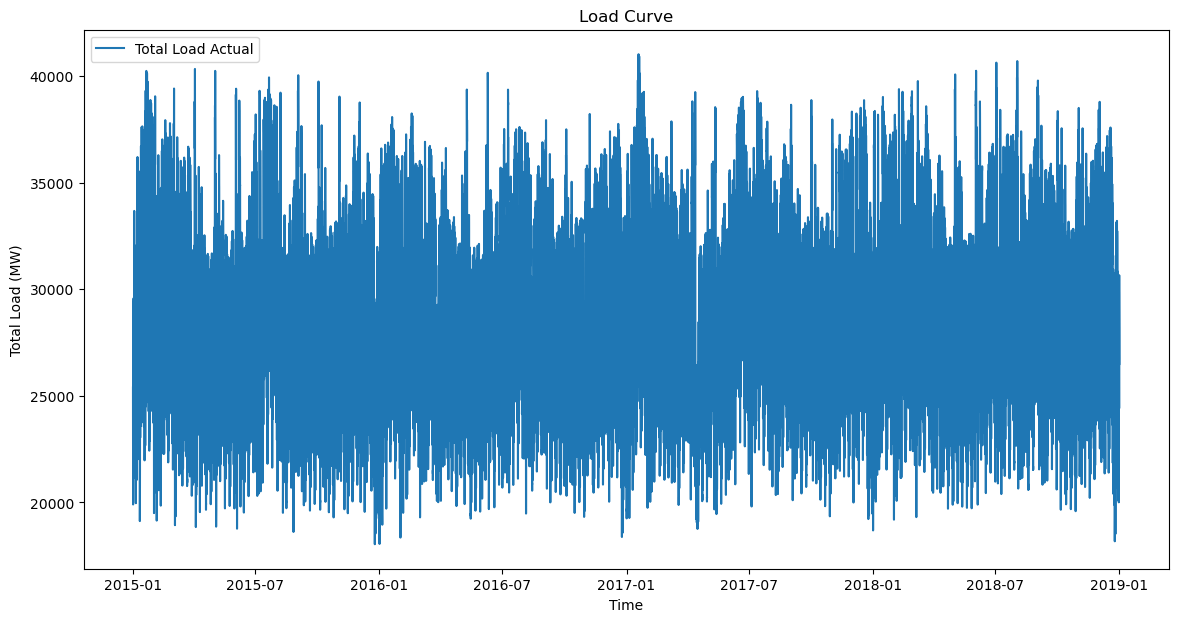

In [19]:
# Plot total load actual over time
plt.figure(figsize=(14, 7))
plt.plot(df_energy_weather['time'], df_energy_weather['total load actual'], label='Total Load Actual')
#plt.plot(df_energy_weather['time'], df_energy_weather['total load forecast'], label='Total Load Actual')
plt.xlabel('Time')
plt.ylabel('Total Load (MW)')
plt.title('Load Curve')
plt.legend()
plt.show()


<Figure size 2000x1600 with 0 Axes>

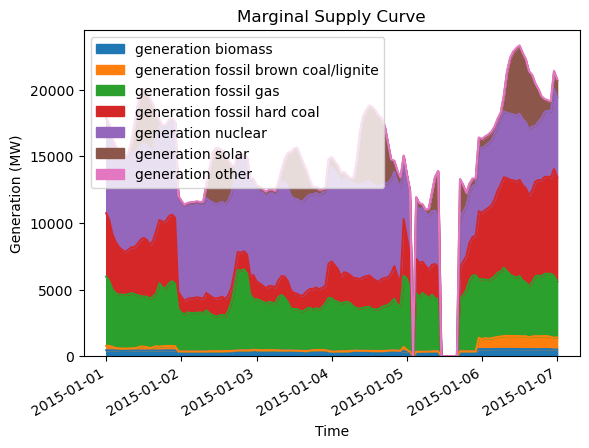

In [20]:
# List of generation columns
generation_columns = [
    'generation biomass', 'generation fossil brown coal/lignite',
    'generation fossil gas', 'generation fossil hard coal',
    'generation nuclear', 'generation solar', 'generation other'
]

# Define the time window
start_date = '2015-01-01'
end_date = '2015-01-7'

# Filter the dataframe for the specified time window
mask = (df_energy_weather['time'] >= start_date) & (df_energy_weather['time'] <= end_date)
filtered_df = df_energy_weather.loc[mask]

plt.figure(figsize=(20, 16))
filtered_df.plot(kind='area', x='time', y=generation_columns, stacked=True)
plt.xlabel('Time')
plt.ylabel('Generation (MW)')
plt.title('Marginal Supply Curve')
plt.legend(loc='upper left')
plt.show()


## Correlation and Dataset Cleaning

Getting useful information from correlation

/tmp/ipykernel_7868/273023936.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_energy = energy_corr.corr()


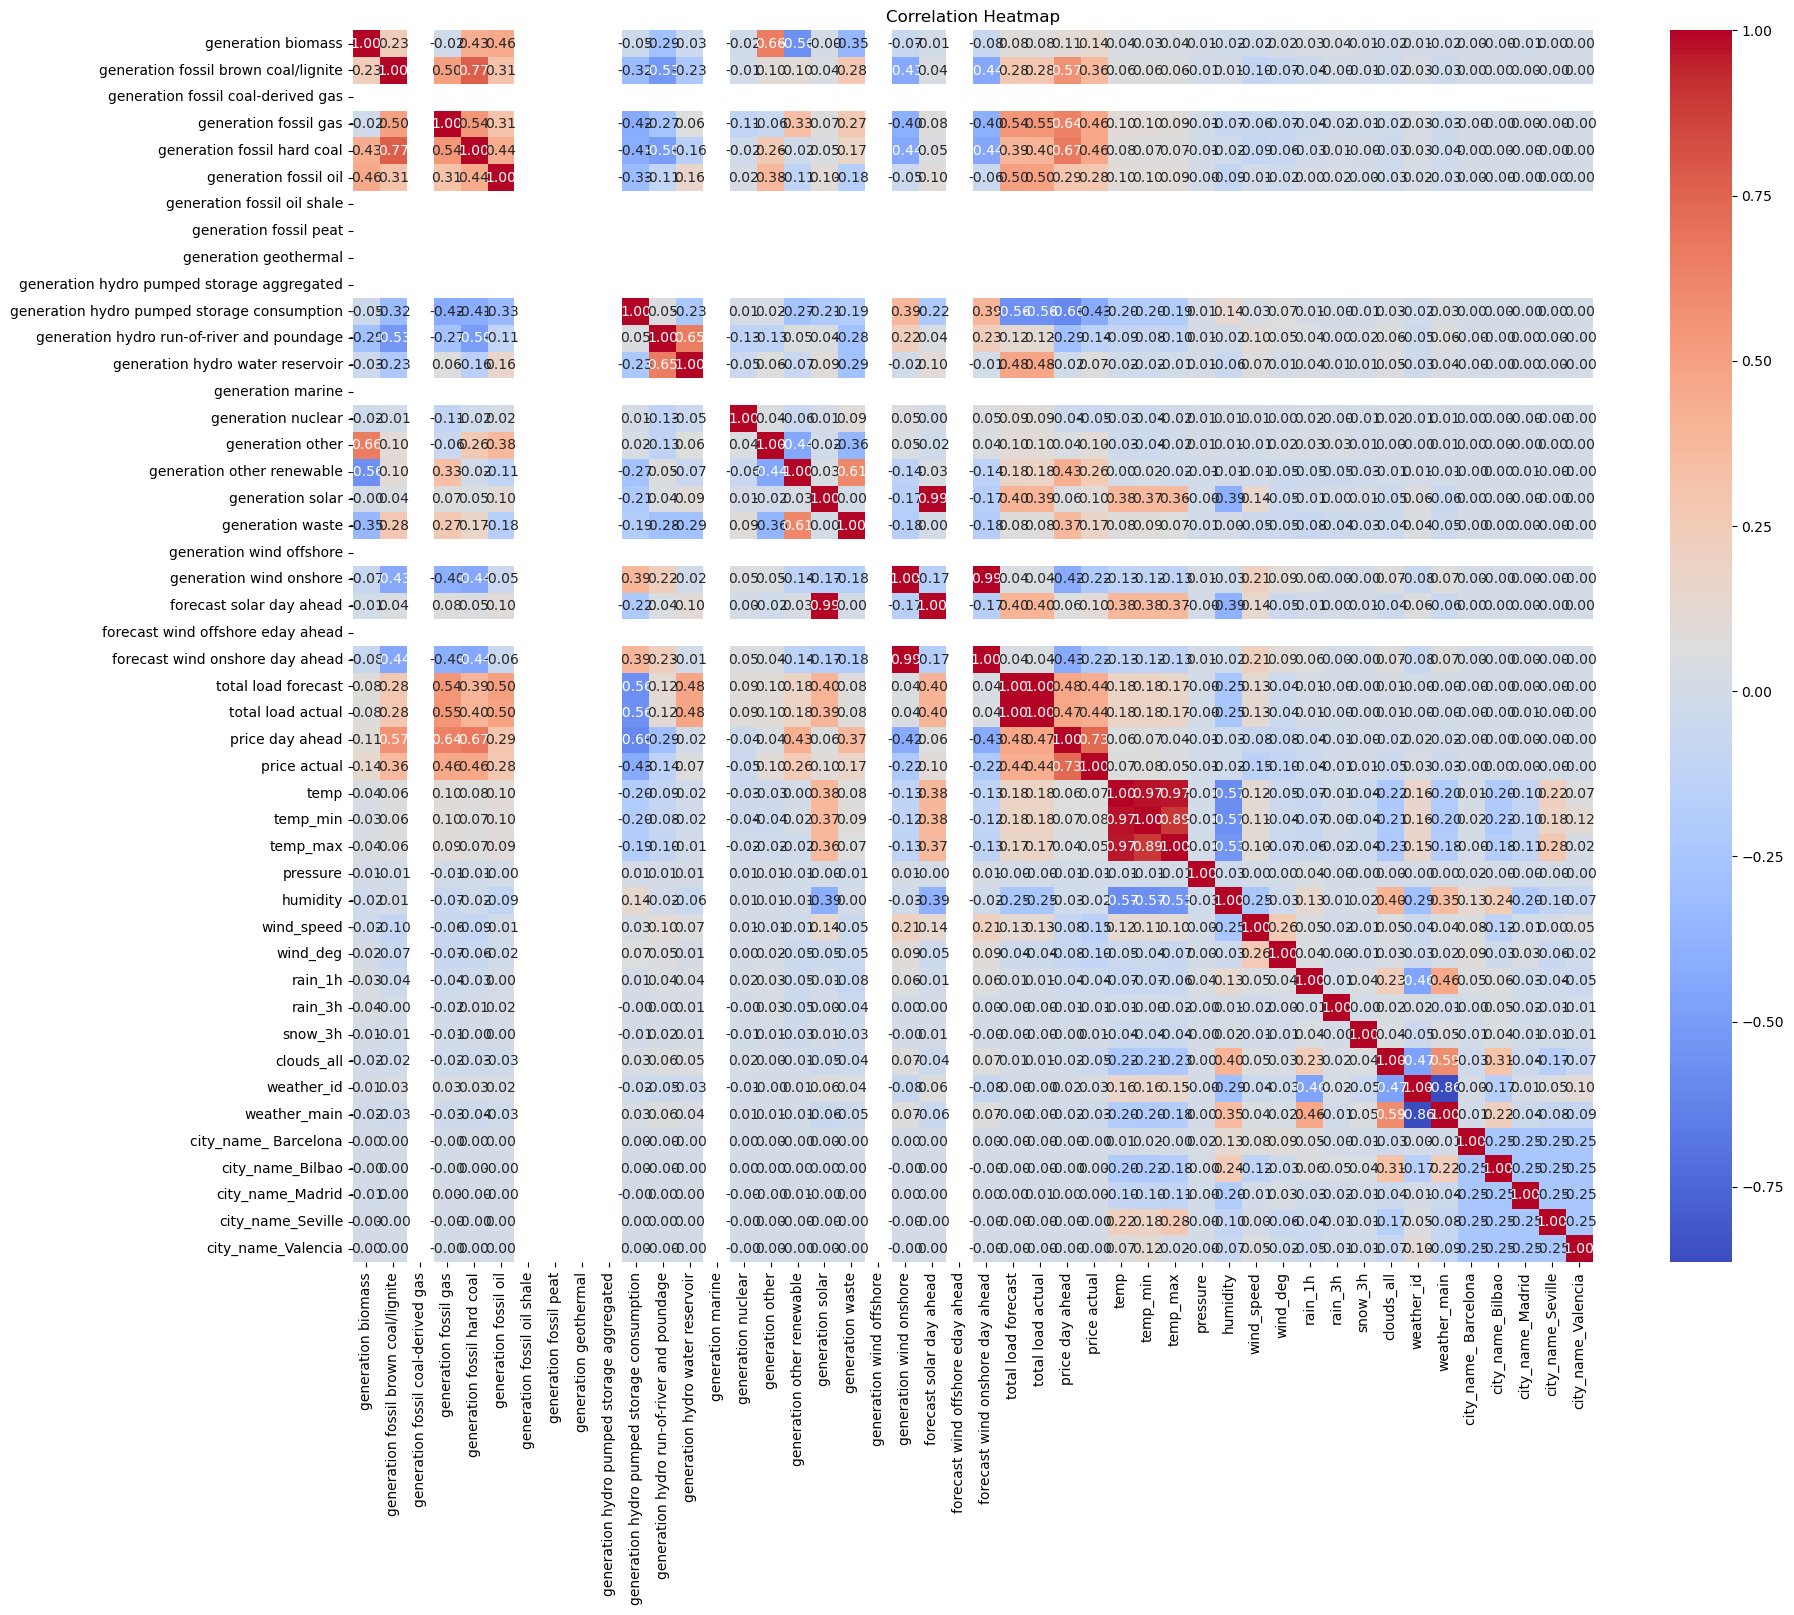

In [21]:
energy_corr = df_energy_weather.drop(columns=['time'])
corr_energy = energy_corr.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_energy, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Cleaning unnecessary columns

We decided to drop features that have not correlation with any of other features, so they useless for our analysis.
1. 'generation fossil coal-derived gas'
2. 'generation fossil oil shale', 
3. 'generation fossil peat', 
4. 'generation geothermal', 
6. 'generation marine', 
7. 'generation wind offshore', 

We decided to drop features that have a high correlation with other features, so they useless for our analysis:
- 'forecast wind onshore day ahead'
- 'forecast solar day ahead',
- 'total load forecast'

bc its overfitting : we can see it from correlation matrix that its 100% correlated to the total load actual 

We decided to drop some column because there is no collected data in them and they are variables that we cannot fill by ourself because they must be collected with a "tool": 
- generation hydro pumped storage aggregated 
- forecast wind offshore eday ahead

In [22]:
df_energy_weather=df_energy_weather.drop(['generation fossil coal-derived gas','generation fossil oil shale', 
                            'generation fossil peat', 'generation geothermal', 'generation marine', 
                            'generation wind offshore', 
                            'total load forecast', 'forecast solar day ahead',
                            'forecast wind onshore day ahead', 'weather_description','weather_icon', 'temp_min', 'temp_max', 
                            'generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead'], 
                            axis=1)

In [23]:
df_energy_weather.head(10)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,rain_3h,snow_3h,clouds_all,weather_id,weather_main,city_name_ Barcelona,city_name_Bilbao,city_name_Madrid,city_name_Seville,city_name_Valencia
0,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,0.0,0.0,0,800,0,0,0,0,0,1
1,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,0.0,0.0,0,800,0,0,0,1,0,0
2,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,0.0,0.0,0,800,0,0,1,0,0,0
3,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,0.0,0.0,0,800,0,1,0,0,0,0
4,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,0.0,0.0,0,800,0,0,0,0,1,0
5,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,0.0,0.0,0,800,0,0,0,0,0,1
6,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,0.0,0.0,0,800,0,0,0,1,0,0
7,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,0.0,0.0,0,800,0,0,1,0,0,0
8,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,0.0,0.0,0,800,0,1,0,0,0,0
9,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,0.0,0.0,0,800,0,0,0,0,1,0


In [24]:
df_energy_weather.isnull().sum()

time                                             0
generation biomass                              95
generation fossil brown coal/lignite            90
generation fossil gas                           90
generation fossil hard coal                     90
generation fossil oil                           95
generation hydro pumped storage consumption     95
generation hydro run-of-river and poundage      95
generation hydro water reservoir                90
generation nuclear                              85
generation other                                90
generation other renewable                      90
generation solar                                90
generation waste                                95
generation wind onshore                         90
total load actual                              180
price day ahead                                  0
price actual                                     0
temp                                             0
pressure                       

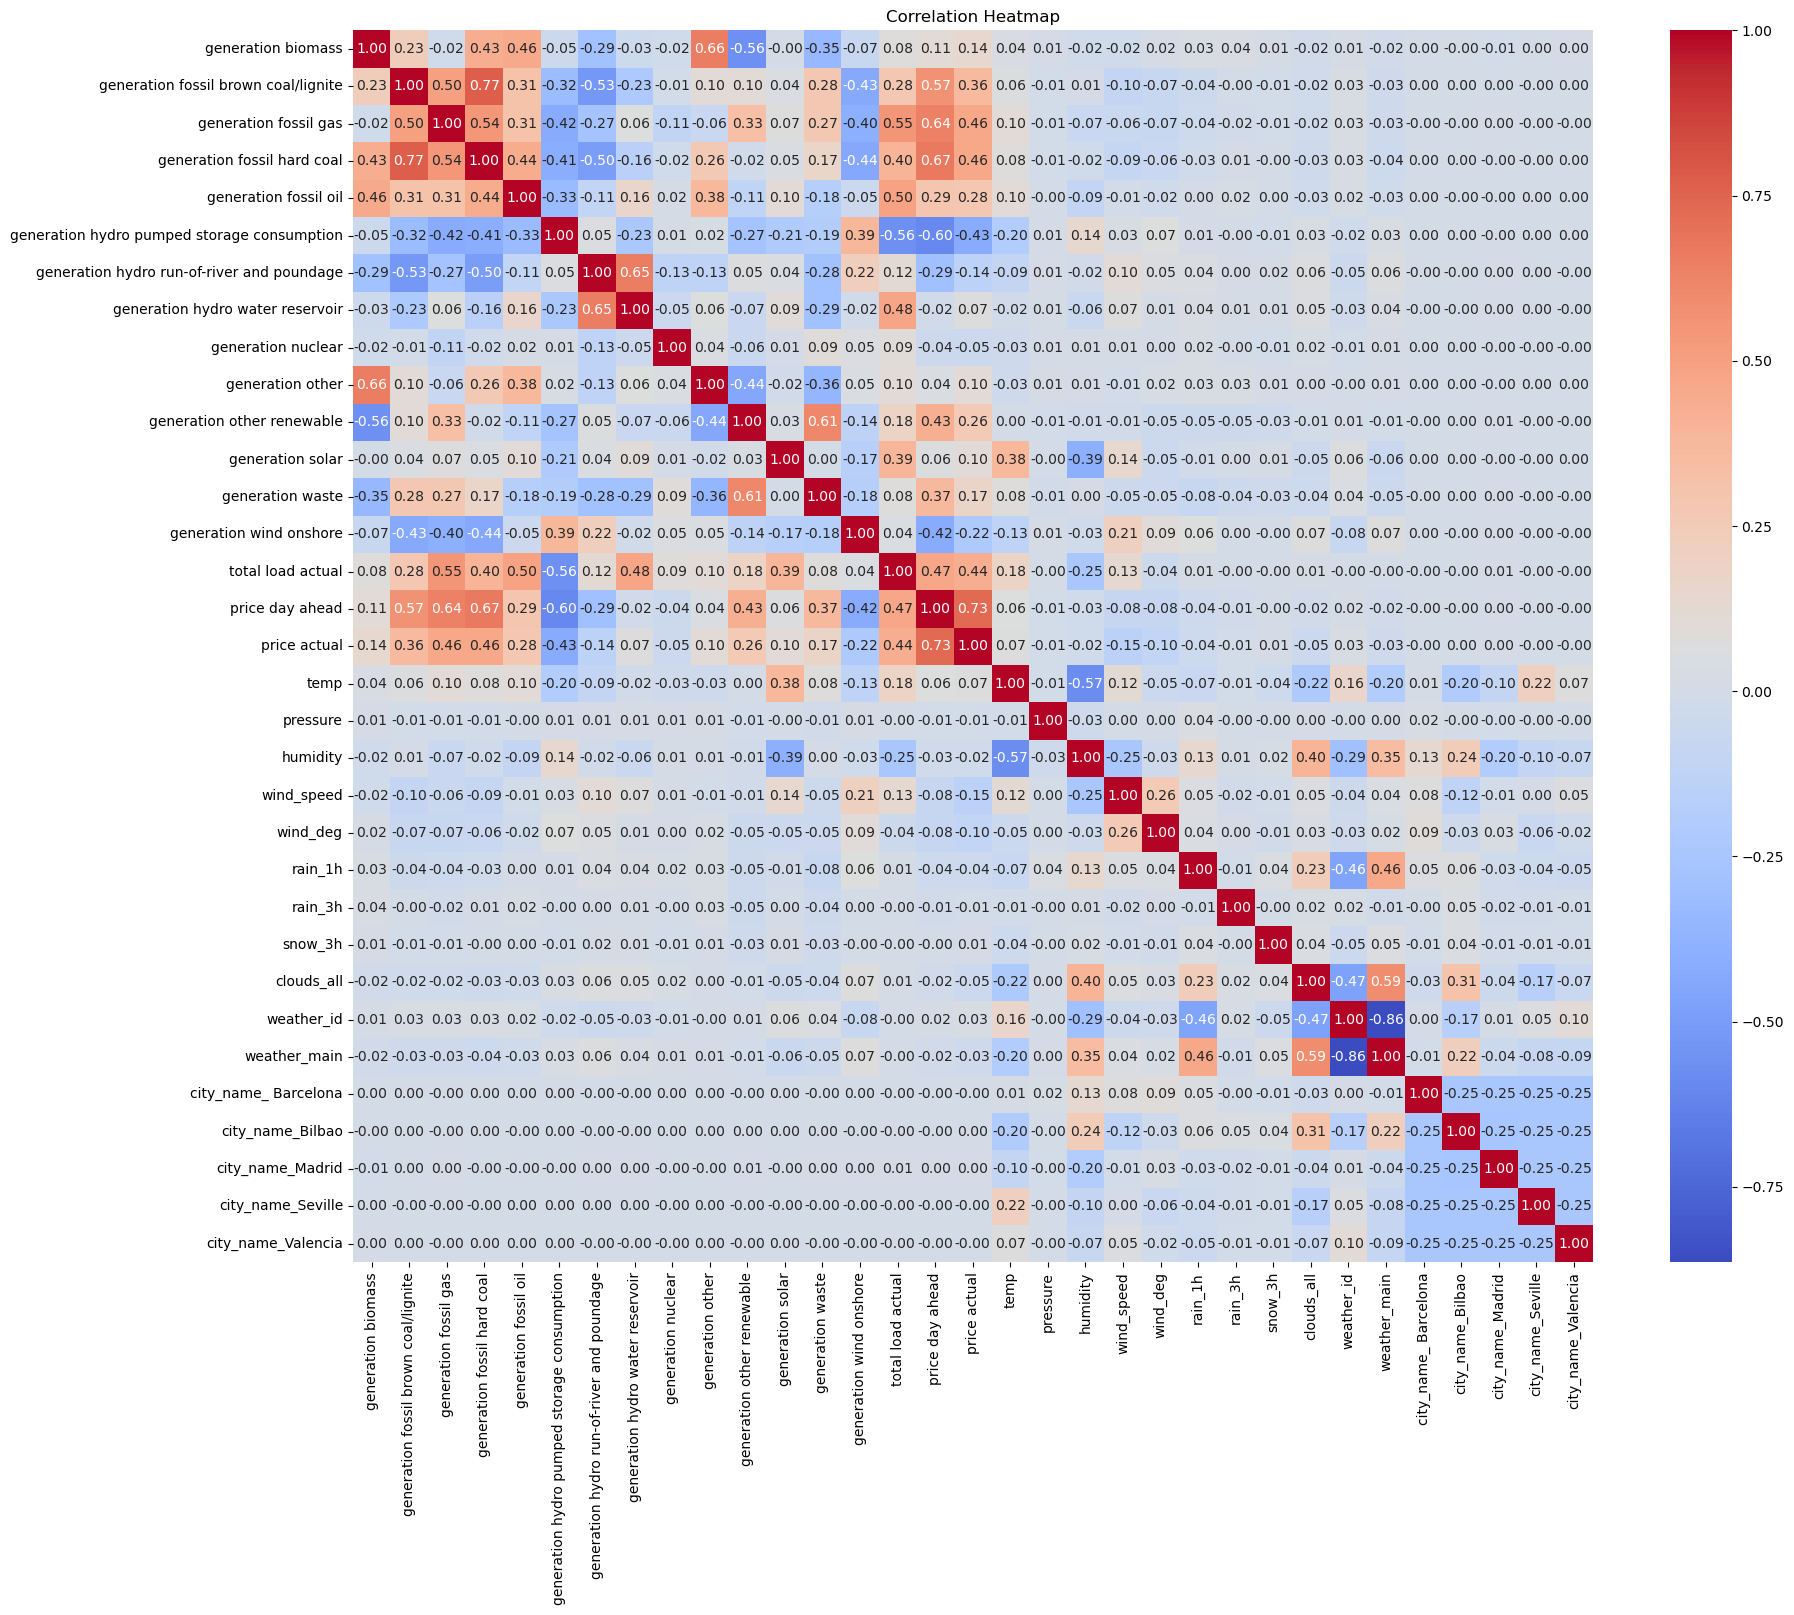

In [25]:
energy_corr = df_energy_weather.drop(columns=['time'])
corr_energy = energy_corr.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_energy, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [26]:
# df_energy_weather.columns

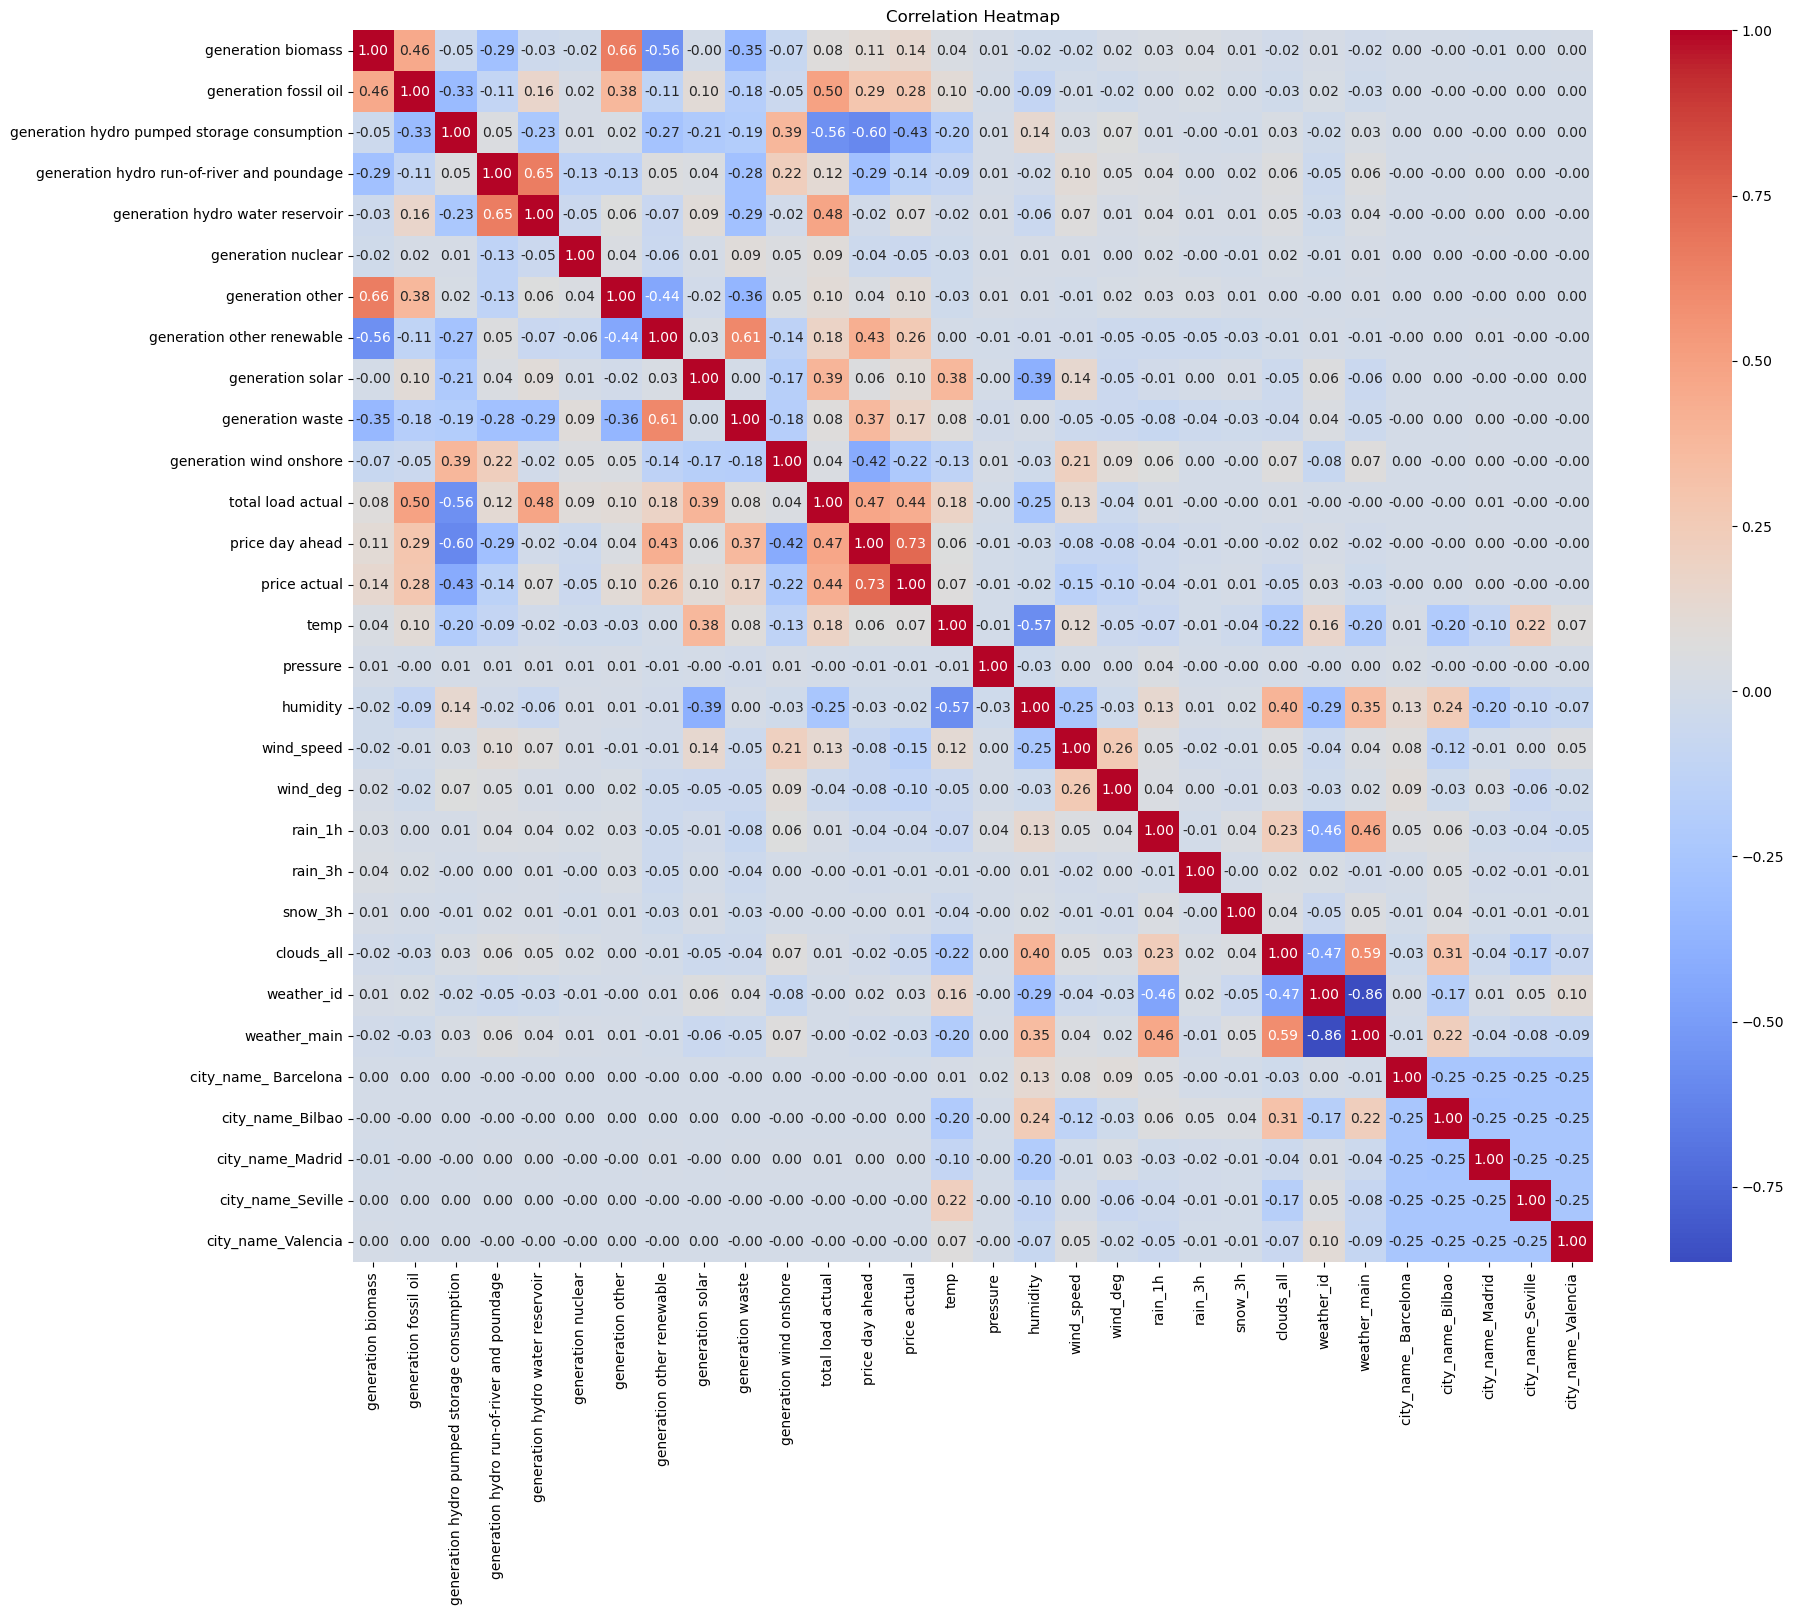

In [27]:
energy_corr = df_energy_weather.drop(columns=['time', 'generation fossil brown coal/lignite','generation fossil gas', 'generation fossil hard coal'])
corr_energy = energy_corr.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_energy, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


## REQUEST 2: What weather measurements, and cities influence most the electrical demand, prices generation capacity.

In [28]:
df_energy_weather.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load actual',
       'price day ahead', 'price actual', 'temp', 'pressure', 'humidity',
       'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h', 'clouds_all',
       'weather_id', 'weather_main', 'city_name_ Barcelona',
       'city_name_Bilbao', 'city_name_Madrid', 'city_name_Seville',
       'city_name_Valencia'],
      dtype='object')

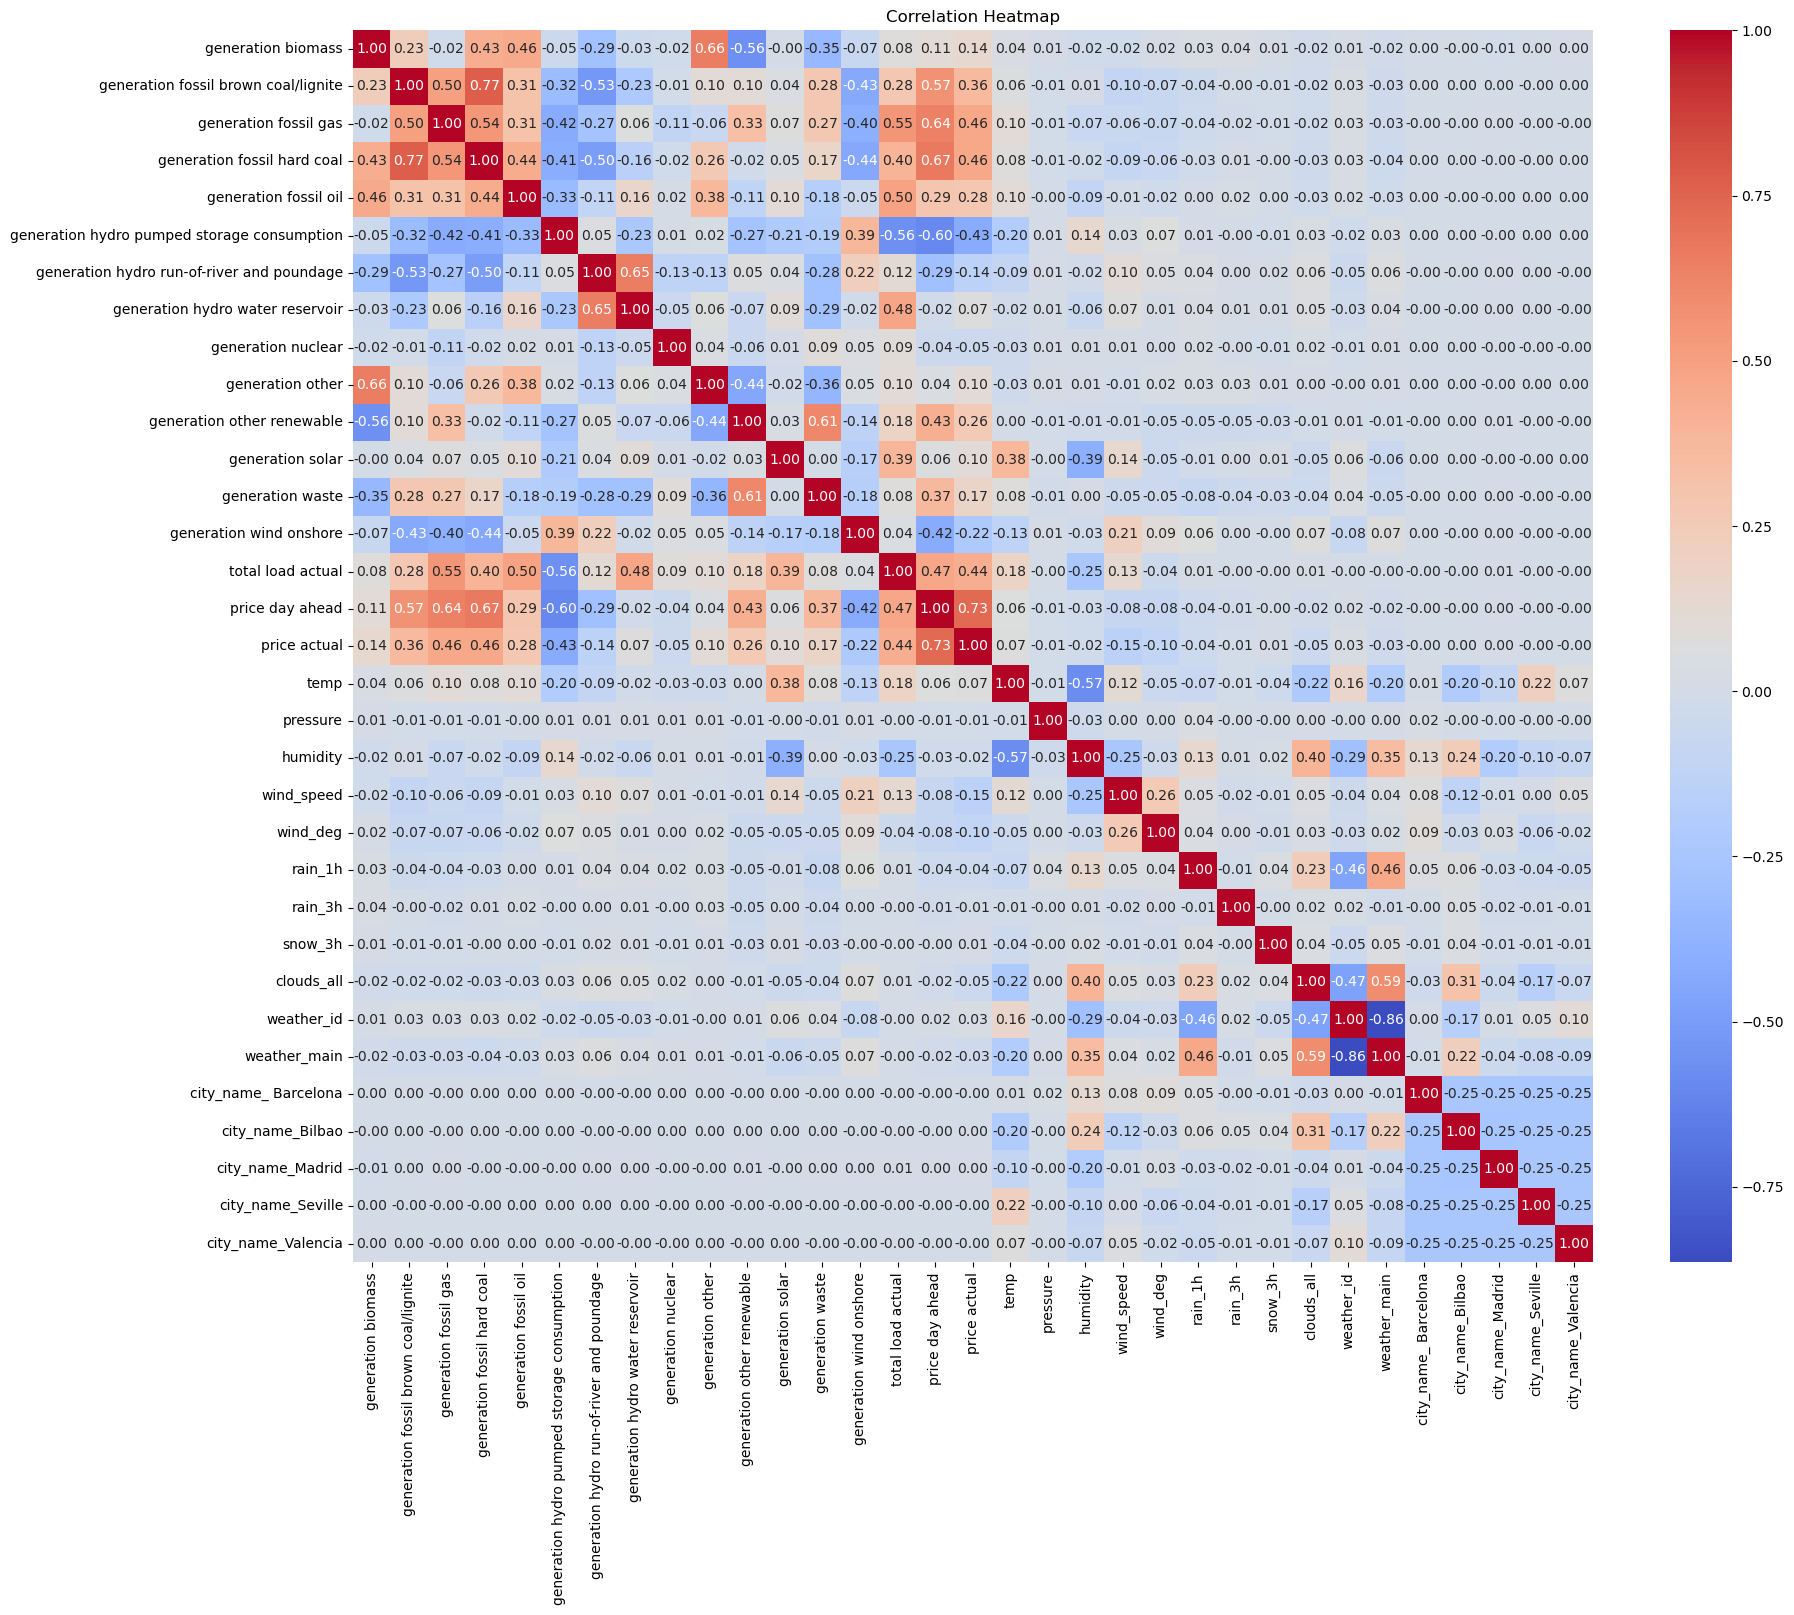

In [29]:
energy_corr = df_energy_weather.drop(columns=['time'])
corr_energy = energy_corr.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_energy, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Request 3: Can we forecast 24 hours in advance better than the TSO?

## Request 4: Can we predict electrical price by time of day better than TSO? 

## Request 5: Forecast intraday price or electrical demand hour-by-hour.

## Request 6: What is the next generation source to be activated on the load curve?